In [3]:
import numpy as np
import pandas as pd
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
image1 = Image.open('/content/Ak (50).png')
image2 = Image.open('/content/Ala_Idris (51).png')
image3 = Image.open('/content/Buzgulu (47).png')
image4 = Image.open('/content/Dimnit (49).png')
image5 = Image.open('/content/Nazli (49).png')

In [19]:
image1,image2, image3, image4, image5

(<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=511x511 at 0x7FF4F0CB46A0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=511x511 at 0x7FF4F0CB7730>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=511x511 at 0x7FF4F0CB77C0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=511x511 at 0x7FF4F0CB7820>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=511x511 at 0x7FF4F0CB7880>)

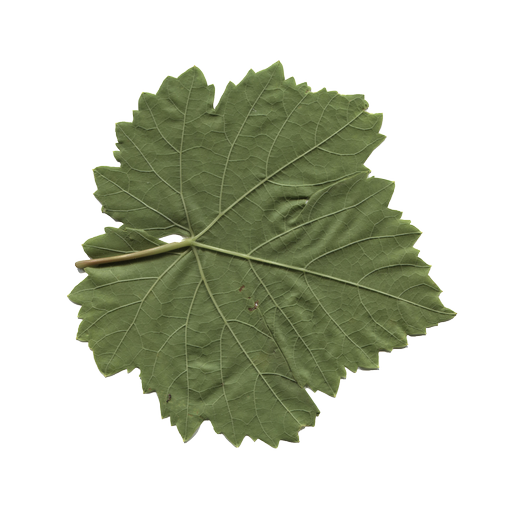

In [20]:
image1

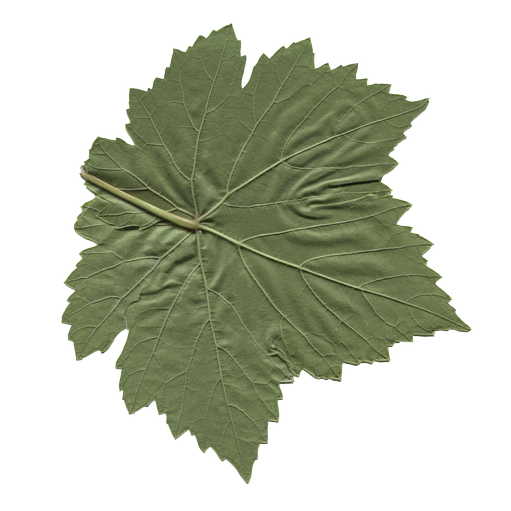

In [21]:
image2

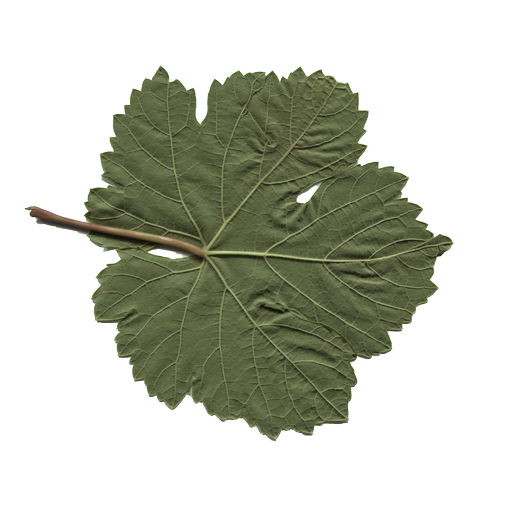

In [22]:
image3

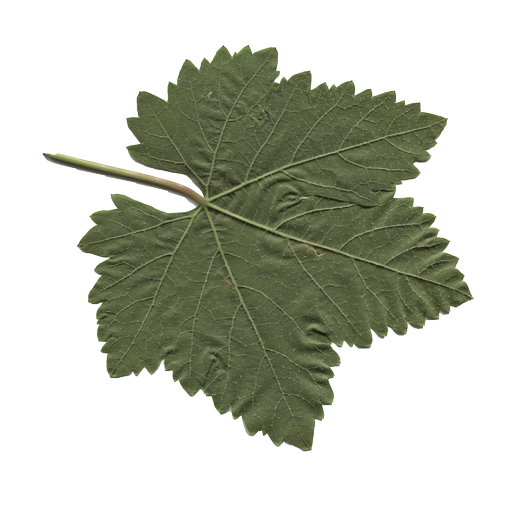

In [23]:
image4

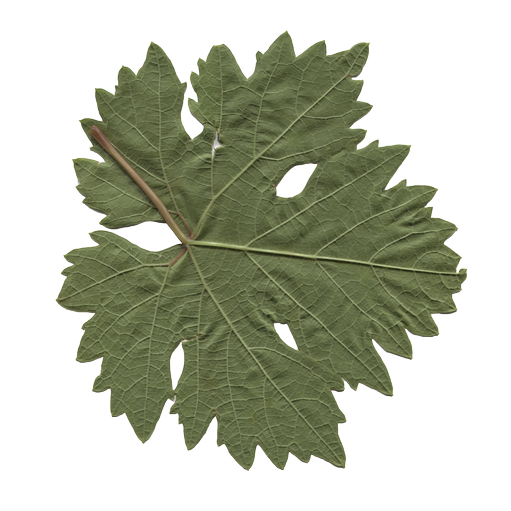

In [24]:
image5

In [5]:
image1.size, image2.size, image3.size, image4.size, image5.size

((511, 511), (511, 511), (511, 511), (511, 511), (511, 511))

In [6]:
data = ImageDataGenerator(rescale = 1/255.0,validation_split=0.2)

In [7]:
trainData = data.flow_from_directory(directory = '/content/drive/MyDrive/UZUM YAPRAK VERISETI', 
                                     target_size=(256, 256),class_mode='categorical', batch_size=32,shuffle=True, subset = "training")

Found 400 images belonging to 5 classes.


In [8]:
testData = data.flow_from_directory(directory = '/content/drive/MyDrive/UZUM YAPRAK VERISETI', 
                                     target_size=(256, 256),class_mode='categorical', batch_size=32,shuffle=True, subset = "validation")

Found 100 images belonging to 5 classes.


In [9]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,MaxPooling2D,Dropout

In [10]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(256,256,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = (3,3), activation ="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32, activation ="relu"))
model.add(Dense(64, activation ="relu"))
model.add(Dense(32, activation ="relu"))
model.add(Dense(5, activation ="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 62, 62, 64)        0

In [11]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [12]:
history = model.fit(trainData, steps_per_epoch= len(trainData), epochs = 30, verbose= 1, validation_data = testData, validation_steps = len(testData))

Epoch 1/30
13/13 [==============================] - 181s 14s/step - loss: 5.5641 - accuracy: 0.1825 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 2/30
13/13 [==============================] - 137s 11s/step - loss: 1.6141 - accuracy: 0.2125 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 3/30
13/13 [==============================] - 141s 11s/step - loss: 1.6099 - accuracy: 0.2000 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 4/30
13/13 [==============================] - 140s 11s/step - loss: 1.6069 - accuracy: 0.2000 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 5/30
13/13 [==============================] - 146s 11s/step - loss: 1.6001 - accuracy: 0.2075 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 6/30
13/13 [==============================] - 138s 11s/step - loss: 1.5781 - accuracy: 0.2500 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 7/30
13/13 [==============================] - 141s 11s/step - loss: 1.4704 - accuracy: 0.3325 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, layers

In [14]:
InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False,  input_shape=(256, 256, 3))

87910968/87910968 [==============================] - 1s 0us/step


In [15]:
for layer in InceptionV3_model.layers[:-1]:
    layer.trainable = False

x = InceptionV3_model.output
x = layers.MaxPool2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(units=512, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(units=512, activation='relu')(x)
x = layers.Dropout(0.3)(x)
output  = layers.Dense(units=5, activation='softmax')(x)
model = Model(InceptionV3_model.input, output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 127, 127, 32  96         ['conv2d_4[0][0]']               
 rmalization)                   )                                                             

In [16]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [17]:
history = model.fit(trainData, steps_per_epoch= len(trainData), epochs = 30, verbose= 1, validation_data = testData, validation_steps = len(testData))

Epoch 1/30
13/13 [==============================] - 100s 7s/step - loss: 9.6211 - accuracy: 0.2600 - val_loss: 2.7677 - val_accuracy: 0.3700
Epoch 2/30
13/13 [==============================] - 90s 7s/step - loss: 2.7927 - accuracy: 0.4575 - val_loss: 1.3517 - val_accuracy: 0.5500
Epoch 3/30
13/13 [==============================] - 89s 7s/step - loss: 1.2713 - accuracy: 0.5625 - val_loss: 1.1883 - val_accuracy: 0.5500
Epoch 4/30
13/13 [==============================] - 92s 7s/step - loss: 0.8601 - accuracy: 0.6400 - val_loss: 1.0134 - val_accuracy: 0.5800
Epoch 5/30
13/13 [==============================] - 92s 7s/step - loss: 0.7677 - accuracy: 0.7150 - val_loss: 1.0357 - val_accuracy: 0.6300
Epoch 6/30
13/13 [==============================] - 92s 7s/step - loss: 0.6644 - accuracy: 0.7500 - val_loss: 0.9812 - val_accuracy: 0.6500
Epoch 7/30
13/13 [==============================] - 88s 7s/step - loss: 0.4910 - accuracy: 0.8150 - val_loss: 0.9656 - val_accuracy: 0.6800
Epoch 8/30
13/13 [=